# Whether-Weather-Drives-Crime
## Analytics with Python (Matplotlib, Pandas, and API Requests)
### Data Analytics Bootcamp - Project 1 - Group 7

#### Team Members
Minna Wu<br>
Tim Sutherland<br>
Wenjie Shao<br>
Gobind Singh<br>

#### Project Description 
We are interested in seeing whether there is a correlation weather and the number of major crimes commited. For this project, we decided to look at just the City of Toronto.
 
#### Research Questions to Answer 
Is there a correlation between weather and major crimes?<br>
- Temperature vs. crime
- Weekend or weekday vs. crime
- Precipitation vs. crime
- Moon phase vs. crime

#### Data Sets to be Used
2 APIs:
- MCI (Major Crime Indicators) 2014-2017 (http://data.torontopolice.on.ca/datasets/mci-2014-to-2017/geoservice)
- World Weather Online (https://www.worldweatheronline.com/developer/premium-api-explorer.aspx)

#### Rough Breakdown of Tasks
Minna Wu: Pulling and cleaning of Weather Data<br>
Wenjie Shao: Pulling and cleaning of Crime Data<br>
Gobind Singh:  Preparing data using Pandas<br>
Tim Sutherland: Plotting charts and final analysis write-up<br>

In [2]:
# Dependencies
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import math
import seaborn as sb

## Pulling and Cleaning Crime Data

In [3]:
# Set up query url
base_url = "https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/MCI_2014_2017/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

In [4]:
# Prepare lists for storing crime data
date_of_crime = []
day_of_week_crime = []
crime_type_list = []

# Setup offset variable (2000 records max in each pull but >130,000 records in total)
total_pulls = math.ceil(131073/2000) # 66

for pull_num in range(total_pulls):
    
    offset_num = pull_num*2000
    url = f"{base_url}&resultOffset={offset_num}"
    crime_data = requests.get(url).json()
    
    for i in range(len(crime_data['features'])):
        
        # Convert occurrence date to match weather date
        day = str(crime_data['features'][i]['attributes']['occurrenceday'])
        if day.isnumeric():
            if int(day) < 10:
                formatted_day = '0' + str(day)
            else:
                formatted_day = str(day)
        else: # if date record is missing
            continue

        month = crime_data['features'][i]['attributes']['occurrencemonth']
        month_dict = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05',\
                    'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10',\
                    'November':'11', 'December':'12'}
        formatted_month = month_dict[month]
        year = crime_data['features'][i]['attributes']['occurrenceyear']

        # Exclude dates outside of 2014 to 2017 range (since MCI 2014-2017 has some records prior to 2014)
        if year < 2014:
            continue

        formatted_date = f"{year}-{formatted_month}-{formatted_day}"
        #print(formatted_date)
        date_of_crime.append(formatted_date)

        # Weekday
        weekday = crime_data['features'][i]['attributes']['occurrencedayofweek']
        day_of_week_crime.append(weekday)

        # Type of Crime (MCI)
        crime_type = crime_data['features'][i]['attributes']['MCI']
        crime_type_list.append(crime_type)

# Store lists into a dataframe
crime_df = pd.DataFrame({'Date': date_of_crime,
                         'Day_of_week': day_of_week_crime,
                         'Type': crime_type_list})

crime_df.head()

,Date,Day_of_week,Type
0,2014-01-25,Saturday,Assault
1,2014-01-25,Saturday,Assault
2,2014-01-25,Saturday,Assault
3,2014-01-25,Saturday,Break and Enter
4,2014-01-25,Saturday,Break and Enter


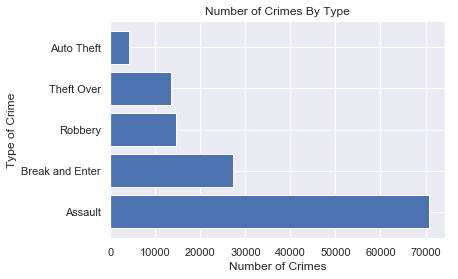

In [5]:
import seaborn as sb
sb.set()
plt.title('Number of Crimes By Type')
plt.barh(np.arange(5), crime_df['Type'].value_counts())
plt.yticks(np.arange(5), ['Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft'])
plt.xlabel('Number of Crimes')
plt.ylabel('Type of Crime')
plt.show()

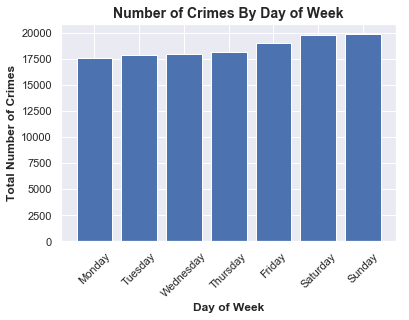

In [26]:
val_count = crime_df['Day_of_week'].value_counts()
val_count.index = (6,5,7,4,3,1,2)
val_count = sorted(val_count)
val_count

plt.title('Number of Crimes By Day of Week', fontweight = 'bold', fontsize = 14)
plt.bar(np.arange(7), val_count)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Day of Week', fontweight = 'bold')
plt.ylabel('Total Number of Crimes', fontweight = 'bold')
plt.savefig('Number of Crimes By Day of Week.png', bbox_inches='tight', dpi = 199)
plt.show()



In [7]:
# trying to pivot
#df = crime_df.pivot(index='Day_of_week', columns='Type', values='Type'.value_counts())
#pd.pivot_table(df, values = 'Value', index=['Country','Year'], columns = 'Indicator').reset_index()
crime_df.head()

#df=crime_df.pivot_table(index='Day_of_week', columns='Type', aggfunc=len, fill_value=0)

#crime2_df = crime_df.pivot_table(index='Day_of_week', columns='Type', aggfunc=len, fill_value=0)
crime2_df = crime_df.pivot_table(index='Day_of_week', columns='Type', aggfunc='size', fill_value=0)
crime2_df

#pd.pivot_table(crime_df,index=["Day_of_week"])
#crime_df.pivot(index='Day_of_week', columns='Type')['baz']
# I know why below is wrong
#crime_df.pivot(index='Day_of_week', columns='Type', values=['Assault', 'Break and Enter', 'Robbery', 'Theft Over', 'Auto Theft'])

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Day_of_week,,,,,
Friday,10051,2075,4640,2298,710
Monday,9519,1876,3893,1926,607
Saturday,11539,1976,3542,2265,536
Sunday,11628,1751,3159,1990,476
Thursday,9375,2002,4126,2007,603
Tuesday,9180,1892,3952,2013,572
Wednesday,9525,1863,3957,2050,593


In [8]:
crime4_df = crime2_df.reset_index()
crime4_df

Type,Day_of_week,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,Friday,10051,2075,4640,2298,710
1,Monday,9519,1876,3893,1926,607
2,Saturday,11539,1976,3542,2265,536
3,Sunday,11628,1751,3159,1990,476
4,Thursday,9375,2002,4126,2007,603
5,Tuesday,9180,1892,3952,2013,572
6,Wednesday,9525,1863,3957,2050,593


In [9]:
crime4_df['index'] = (5,1,6,7,4,2,3)
crime5_df = crime4_df.sort_values(by='index')
crime5_df

Type,Day_of_week,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,index
1,Monday,9519,1876,3893,1926,607,1
5,Tuesday,9180,1892,3952,2013,572,2
6,Wednesday,9525,1863,3957,2050,593,3
4,Thursday,9375,2002,4126,2007,603,4
0,Friday,10051,2075,4640,2298,710,5
2,Saturday,11539,1976,3542,2265,536,6
3,Sunday,11628,1751,3159,1990,476,7


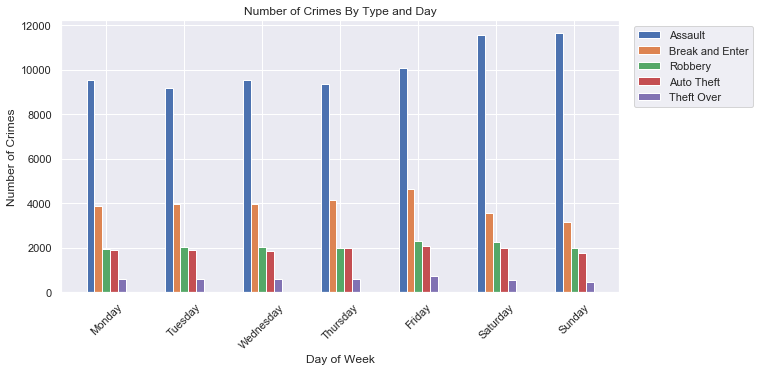

In [10]:
# Plot Number of Crimes By Type and Day
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

xloc = np.arange(7)  # the x locations for the groups
width = 0.1      # the width of the bars

ax.set(title = 'Number of Crimes By Type and Day', xlabel = 'Day of Week', ylabel = 'Number of Crimes')
ax.bar(xloc - width*2, crime5_df['Assault'], width, label = 'Assault')
ax.bar(xloc - width, crime5_df['Break and Enter'], width, label = 'Break and Enter')
ax.bar(xloc, crime5_df['Robbery'], width, label = 'Robbery')
ax.bar(xloc + width, crime5_df['Auto Theft'], width, label = 'Auto Theft')
ax.bar(xloc + width*2, crime5_df['Theft Over'], width, label = 'Theft Over')
plt.xticks(xloc, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
leg = ax.legend()

#leg = plt.legend(crime_type_by_year_df.index, loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend
xOffset = 0.25
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.savefig('Number of Crimes By Type and Day.png', bbox_inches='tight', dpi = 199)
plt.show()
#crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']].plot(kind='bar')

In [11]:
#Trying to add total crimes column
#crime2_df.loc['Total']= crime2_df.sum()
#Total Crimes = [row.'Assault' + row.'Auto Theft' + row.'Break and Enter' + row.'Robbery' + row.'Theft Over'  for index, row in crime2_df.iterrows()]

#Why the below doesn't work, but the one further below does ???
#crime3_df = crime2_df['Total Crimes']=crime2_df.iloc[:,-5:].sum(axis=1)
#crime3_df


#crime2_df['Total Crimes']=crime2_df.iloc[:,-5:].sum(axis=1)
#crime2_df

#crime3_df = crime2_df['Total Crimes'] = crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']].sum(axis=1)
#LOL the total is wrong. EDIT1 - The total goes up with every execution.
#crime3_df
crime2_df['Total Crimes'] = crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']].sum(axis=1)
crime2_df

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Friday,10051,2075,4640,2298,710,19774
Monday,9519,1876,3893,1926,607,17821
Saturday,11539,1976,3542,2265,536,19858
Sunday,11628,1751,3159,1990,476,19004
Thursday,9375,2002,4126,2007,603,18113
Tuesday,9180,1892,3952,2013,572,17609
Wednesday,9525,1863,3957,2050,593,17988


In [12]:
crime3_df = crime2_df
crime3_df

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Friday,10051,2075,4640,2298,710,19774
Monday,9519,1876,3893,1926,607,17821
Saturday,11539,1976,3542,2265,536,19858
Sunday,11628,1751,3159,1990,476,19004
Thursday,9375,2002,4126,2007,603,18113
Tuesday,9180,1892,3952,2013,572,17609
Wednesday,9525,1863,3957,2050,593,17988


Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Friday,10051,2075,4640,2298,710,19774
Monday,9519,1876,3893,1926,607,17821
Saturday,11539,1976,3542,2265,536,19858
Sunday,11628,1751,3159,1990,476,19004
Thursday,9375,2002,4126,2007,603,18113
Tuesday,9180,1892,3952,2013,572,17609
Wednesday,9525,1863,3957,2050,593,17988


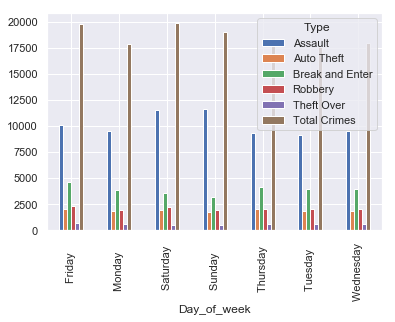

In [13]:
crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over','Total Crimes']].plot(kind='bar')
crime3_df

In [14]:
#crime3_df = crime3_df.rename(index={0:'Weekend',1:'Weekday'}, inplace=True)
#crime3_df
indexNamesArr = crime3_df.index.values
indexNamesArr[0] = 'Weekend'
indexNamesArr[1] = 'Weekday'
indexNamesArr[2] = 'Weekend'
indexNamesArr[3] = 'Weekend'
indexNamesArr[4] = 'Weekday'
indexNamesArr[5] = 'Weekday'
indexNamesArr[6] = 'Weekday'
crime3_df

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Weekend,10051,2075,4640,2298,710,19774
Weekday,9519,1876,3893,1926,607,17821
Weekend,11539,1976,3542,2265,536,19858
Weekend,11628,1751,3159,1990,476,19004
Weekday,9375,2002,4126,2007,603,18113
Weekday,9180,1892,3952,2013,572,17609
Weekday,9525,1863,3957,2050,593,17988


In [15]:
crime3_df.groupby(crime3_df.index).sum()
crime3_df

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Weekend,10051,2075,4640,2298,710,19774
Weekday,9519,1876,3893,1926,607,17821
Weekend,11539,1976,3542,2265,536,19858
Weekend,11628,1751,3159,1990,476,19004
Weekday,9375,2002,4126,2007,603,18113
Weekday,9180,1892,3952,2013,572,17609
Weekday,9525,1863,3957,2050,593,17988


In [16]:
crime6_df = crime3_df.groupby('Day_of_week').sum().reset_index()
crime6_df

Type,Day_of_week,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
0,Weekday,37599,7633,15928,7996,2375,71531
1,Weekend,33218,5802,11341,6553,1722,58636


In [17]:
#crime4_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over','Total Crimes']].plot(kind='bar')

In [18]:
# THE BELOW LINE HAS TO BE UNCOMMENTED IF YOU WANT TO SET THE INDEX AGAIN TO THE 'Day_of_week'
#crime6_df = crime6_df.set_index('Day_of_week')
crime6_df

Type,Day_of_week,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
0,Weekday,37599,7633,15928,7996,2375,71531
1,Weekend,33218,5802,11341,6553,1722,58636


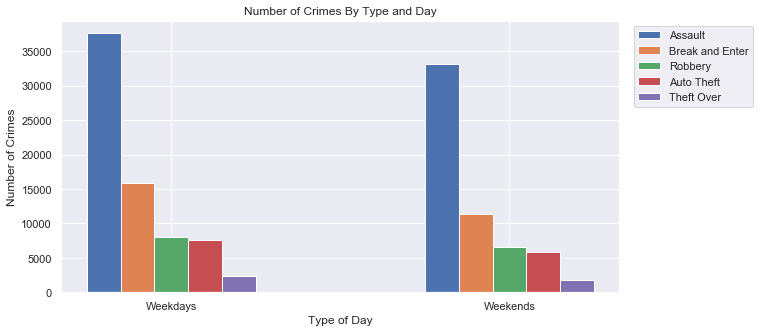

In [19]:
#crime6_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over','Total Crimes']].plot(kind='bar')
#--------------------------
# Plot Number of Crimes By Weekday and Weekend
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

xloc = np.arange(2)  # the x locations for the groups
width = 0.1      # the width of the bars

ax.set(title = 'Number of Crimes By Type and Day', xlabel = 'Type of Day', ylabel = 'Number of Crimes')
ax.bar(xloc - width*2, crime6_df['Assault'], width, label = 'Assault')
ax.bar(xloc - width, crime6_df['Break and Enter'], width, label = 'Break and Enter')
ax.bar(xloc, crime6_df['Robbery'], width, label = 'Robbery')
ax.bar(xloc + width, crime6_df['Auto Theft'], width, label = 'Auto Theft')
ax.bar(xloc + width*2, crime6_df['Theft Over'], width, label = 'Theft Over')
plt.xticks(xloc, ['Weekdays', 'Weekends'])# rotation = 45)
leg = ax.legend()


#leg = plt.legend(crime_type_by_year_df.index, loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend
xOffset = 0.25
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

#plt.savefig('Number of Crimes By Type and Day.png', bbox_inches='tight', dpi = 199)
plt.show()
#crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']].plot(kind='bar')

In [21]:
crime7_df = crime6_df
crime7_df = crime7_df.set_index('Day_of_week')
crime7_df

Type,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
Day_of_week,,,,,,
Weekday,37599,7633,15928,7996,2375,71531
Weekend,33218,5802,11341,6553,1722,58636


In [40]:
avg_df

,Weekday,Weekend
Type,,
Assault,9399.75,11072.666667
Auto Theft,1908.25,1934.000000
Break and Enter,3982.00,3780.333333
Robbery,1999.00,2184.333333
Theft Over,593.75,574.000000
Total Crimes,17882.75,19545.333333


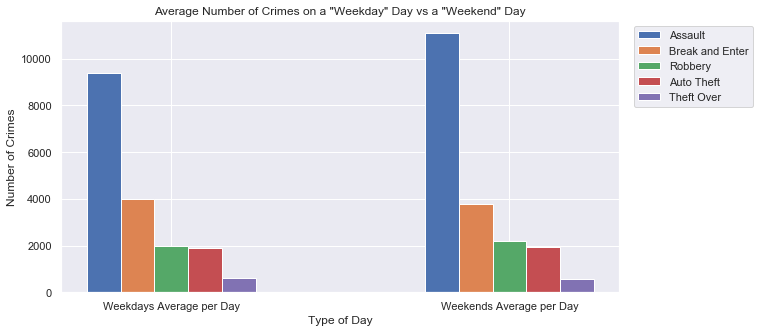

In [45]:
weekday_avg = crime7_df.iloc[0,:]/4
weekend_avg = crime7_df.iloc[1,:]/3
avg_df = pd.DataFrame({'Weekday': weekday_avg,
                     'Weekend': weekend_avg})
avg_df = avg_df.T

# Plot Number of Crimes By Weekday and Weekend
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

xloc = np.arange(2)  # the x locations for the groups
width = 0.1      # the width of the bars

ax.set(title = 'Average Number of Crimes on a "Weekday" Day vs a "Weekend" Day', xlabel = 'Type of Day', ylabel = 'Number of Crimes')
ax.bar(xloc - width*2, avg_df['Assault'], width, label = 'Assault')
ax.bar(xloc - width, avg_df['Break and Enter'], width, label = 'Break and Enter')
ax.bar(xloc, avg_df['Robbery'], width, label = 'Robbery')
ax.bar(xloc + width, avg_df['Auto Theft'], width, label = 'Auto Theft')
ax.bar(xloc + width*2, avg_df['Theft Over'], width, label = 'Theft Over')
plt.xticks(xloc, ['Weekdays Average per Day', 'Weekends Average per Day'])#, rotation = 45)
leg = ax.legend()


#leg = plt.legend(crime_type_by_year_df.index, loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend
xOffset = 0.25
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.savefig('Number of Average Crimes On Weekend vs Weekday.png', bbox_inches='tight', dpi = 199)
plt.show()


In [22]:
crime8_df = crime7_df.reset_index()
crime8_df

Type,Day_of_week,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Total Crimes
0,Weekday,37599,7633,15928,7996,2375,71531
1,Weekend,33218,5802,11341,6553,1722,58636


In [26]:
crime7_df['Weekday'] = crime7_df['Weekday'] / 4
crime7_df

KeyError: 'Weekday'

In [ ]:
#Trying to get the total number of crimes into the grapg plotted above
#crime2_df[['Assault','Auto Theft','Break and Enter','Robbery','Theft Over']].plot(kind='bar')

In [ ]:
crime_df.count()

In [ ]:
# Histogram by Type of Crime
sb.set()
plt.hist(crime_type_list)
plt.title('Number of Crimes in Toronto by Type (2014-2017)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Major Crime Indicator', fontweight = 'bold')
plt.ylabel('Number of Crimes (2014-2017)', fontweight = 'bold')
plt.grid()
plt.show()

In [ ]:
# Prepare data for plotting number of crimes by year
crimes_2014 = crime_df[crime_df.Date.str.startswith('2014')] # 31578 records
crimes_2015 = crime_df[crime_df.Date.str.startswith('2015')] # 32197 records
crimes_2016 = crime_df[crime_df.Date.str.startswith('2016')] # 32601 records
crimes_2017 = crime_df[crime_df.Date.str.startswith('2017')] # 33791 records
num_crimes_2014 = crimes_2014.groupby('Type').count()['Date'] 
num_crimes_2015 = crimes_2015.groupby('Type').count()['Date']
num_crimes_2016 = crimes_2016.groupby('Type').count()['Date']
num_crimes_2017 = crimes_2017.groupby('Type').count()['Date']
crime_type_by_year_df = pd.DataFrame({'2014': num_crimes_2014,
                                     '2015': num_crimes_2015,
                                     '2016': num_crimes_2015,
                                     '2017': num_crimes_2015})

# Create Line Plot of the Number of Crimes By Year
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(crime_type_by_year_df.T)
plt.title('Number of Crimes in Toronto by Year (2014-2017)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Number of Crimes (2014-2017)', fontweight = 'bold')
leg = plt.legend(crime_type_by_year_df.index, loc = 'upper right')

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend
xOffset = 0.4
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)

plt.show()
crime_type_by_year_df

In [ ]:
# WWO apikey
apikey = "5b2e615f18924a049ad18340018171"

In [ ]:
# Prepare lists for storing weather data
date_list = []
temp_list = []
moon_list = []
rain_list = []
years_of_interest = ['2014', '2015', '2016', '2017']
months_of_interest = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
last_day_of_month = ['31', '28', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']

for year in years_of_interest:
    for i in range(12):
        
        # Prepare start and end dates for query
        start_date = f"{year}-{months_of_interest[i]}-01"
        end_date = f"{year}-{months_of_interest[i]}-{last_day_of_month[i]}"
        
        # Prepare url (24hr average)
        weather_url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={apikey}&q=Toronto&format=json&date={start_date}&enddate={end_date}&tp=24"
        
        # Request and store json data
        data = requests.get(weather_url).json()
        
        for day in range(len(data['data']['weather'])):
            # Date
            date_list.append(data['data']['weather'][day]['date'])

            # Temperature
            temp_list.append(data['data']['weather'][day]['hourly'][0]['tempC'])

            # Precipitation
            rain_list.append(data['data']['weather'][day]['hourly'][0]['precipMM'])

            # Moon_phase
            moon_list.append(data['data']['weather'][day]['astronomy'][0]['moon_phase'])

# Store lists into a dataframe
weather_df = pd.DataFrame({'Date': date_list,
                          'Temp': temp_list,
                          'Precip': rain_list,
                          'Moon Phase': moon_list})

weather_df.head()

In [ ]:
# Test Code Block
start_date = '2014-07-01'
end_date = '2014-07-31'
weather_url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={apikey}&q=Toronto&format=json&date={start_date}&enddate={end_date}&tp=24"
data = requests.get(weather_url).json()
#pprint(data)
print(len(data['data']['weather']))

# Date
print(data['data']['weather'][0]['date'])
# Temperature
print(data['data']['weather'][0]['hourly'][0]['tempC'])
# Precipitation
print(data['data']['weather'][0]['hourly'][0]['precipMM'])
# Moon_phase
print(data['data']['weather'][0]['astronomy'][0]['moon_phase'])